In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_excel("/Users/tanushaerpula/Downloads/Stroke Dataset.xlsx")
print(dataset)
dataset

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


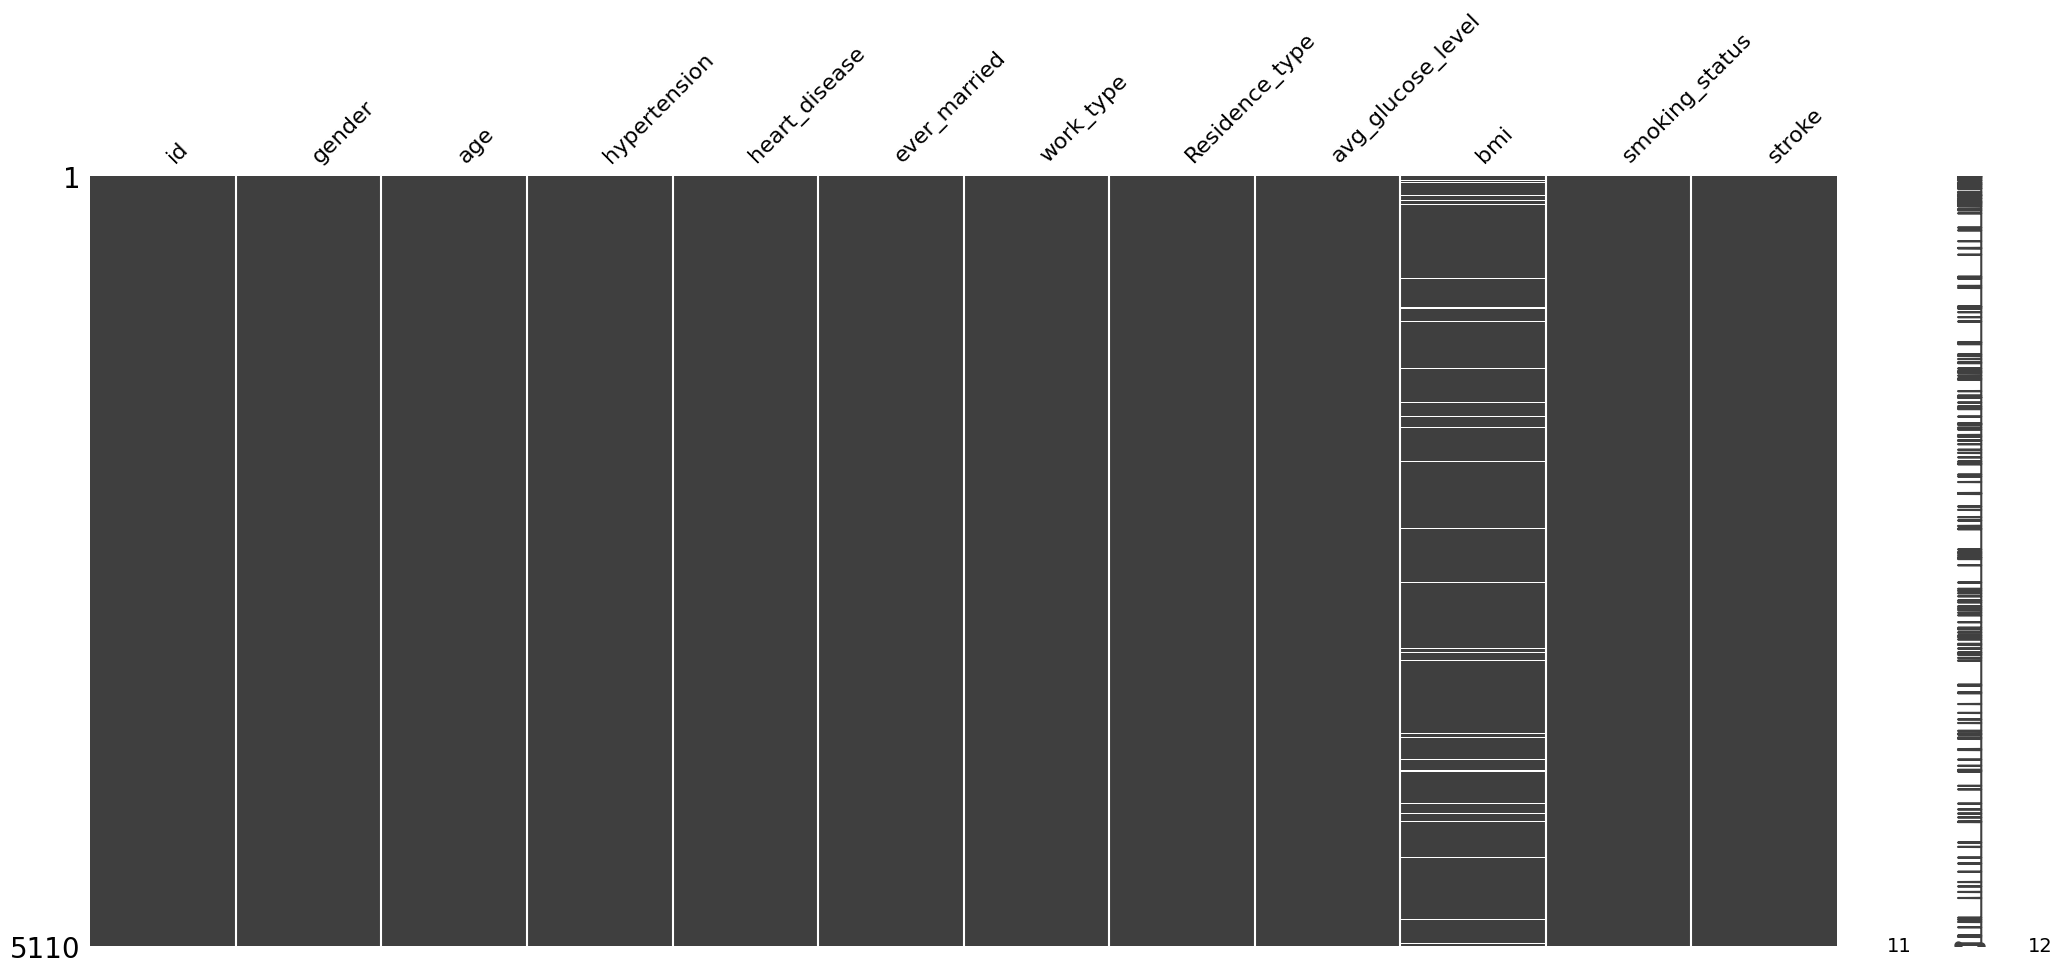

In [5]:
#EDA 
msno.matrix(dataset)
dataset.describe().T

<AxesSubplot: >

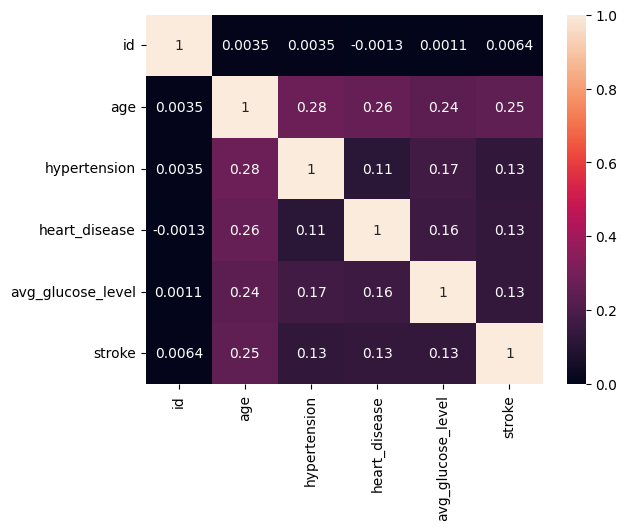

In [6]:
dataset.drop(['bmi'],axis=1, inplace = True)
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
#this corelation heatmap shows us Age, Glucose level, Hypertension and Heart disease has high corelation

In [7]:
#Analyzing between genders
print(dataset.groupby('gender').stroke.value_counts().to_frame())
print(dataset.groupby('gender').hypertension.value_counts())
print(dataset.groupby('gender').heart_disease.value_counts())
#Analyzing between Work Type
print(dataset.groupby('work_type').stroke.value_counts())

               stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1
gender  hypertension
Female  0               2718
        1                276
Male    0               1893
        1                222
Other   0                  1
Name: hypertension, dtype: int64
gender  heart_disease
Female  0                2881
        1                 113
Male    0                1952
        1                 163
Other   0                   1
Name: heart_disease, dtype: int64
work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64


In [8]:
def glucose_level(amount):
    if amount<60:
        return 'Dangerously low'
    elif 60<=amount<90:
        return 'Low'
    elif 90<=amount<110:
        return 'Normal'
    elif 110<=amount<140:
        return 'Slightly high'
    elif 140<=amount<240:
        return 'High'
    elif 240<=amount<300:
        return 'Extremely high'
    else:
        return 'Dangerously high, requires medical attention'
    
dataset['Glucose_level_chart']=dataset['avg_glucose_level'].apply(glucose_level)
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,Glucose_level_chart
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,High
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,High


In [9]:
from sklearn.preprocessing import LabelEncoder
dataset = dataset.apply(LabelEncoder().fit_transform)
print(dataset)

        id  gender  age  hypertension  heart_disease  ever_married  work_type  \
0      671       1   88             0              1             1          2   
1     3610       0   82             0              0             1          3   
2     2151       1  101             0              1             1          2   
3     4226       0   70             0              0             1          2   
4      114       0  100             1              0             1          3   
...    ...     ...  ...           ...            ...           ...        ...   
5105  1312       0  101             1              0             1          2   
5106  3100       0  102             0              0             1          3   
5107  1396       0   56             0              0             1          3   
5108  2601       1   72             0              0             1          2   
5109  3089       0   65             0              0             1          0   

      Residence_type  avg_g

In [10]:
#dataset.drop(['id','work_type','ever_married','Residence_type'],axis=1,inplace=True)
#dataset.drop(['avg_glucose_level'],axis=1,inplace=True)
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,Glucose_level_chart
0,671,1,88,0,1,1,2,1,3850,1,1,2
1,3610,0,82,0,0,1,3,0,3588,2,1,2
2,2151,1,101,0,1,1,2,0,2483,2,1,4
3,4226,0,70,0,0,1,2,1,3385,3,1,2
4,114,0,100,1,0,1,3,0,3394,2,1,2


In [20]:
X = dataset.drop(columns = ["stroke"])
y = dataset["stroke"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
from sklearn.tree import DecisionTreeClassifier

In [21]:
lm=DecisionTreeClassifier()
lm.fit(X_train,y_train)
lm_predictions=lm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,lm_predictions))
print(confusion_matrix(y_test,lm_predictions))
lm.score(X_test,y_test)
from sklearn.metrics import mean_squared_error
mean_sq_error=mean_squared_error(y_test,lm_predictions)
print('Mean squared error: ',mean_sq_error)1roo0
print('Root mean squared error ',mean_sq_error**0.5)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1446
           1       0.19      0.18      0.19        87

    accuracy                           0.91      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.91      0.91      1533

[[1377   69]
 [  71   16]]
Mean squared error:  0.091324200913242
Root mean squared error  0.3021989426077497


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
prediction_rfc= rfc.predict(X_test)
print('Confusion Matrix; ')
print(confusion_matrix(y_test,prediction_rfc))
print('\n')
print('Classification Report: ')
print(classification_report(y_test,prediction_rfc))
rfc.score(X_test,y_test)
mean_sq_error_rfc=mean_squared_error(y_test,prediction_rfc)
print('Mean squared error: ',mean_sq_error_rfc)
print('Root mean squared error ',mean_sq_error_rfc**0.5)

Confusion Matrix; 
[[1445    1]
 [  86    1]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.50      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533

Mean squared error:  0.05675146771037182
Root mean squared error  0.23822566551564467
